In [1]:
import pandas as pd

In [2]:
tr = pd.read_csv(r'D:\Datasets\trainRF.csv')

In [3]:
tr.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
tr.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
tr_train, tr_test = train_test_split(tr, test_size = .2) 

In [8]:
tr_train_x  = tr_train.iloc[: , 0:-1]
tr_train_y  = tr_train.iloc[: , -1]

In [9]:
tr_test_x  = tr_test.iloc[: , 0:-1]
tr_test_y  = tr_test.iloc[: , -1]

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10,
                           min_samples_split = 150)

In [11]:
dt.fit(tr_train_x, tr_train_y)

DecisionTreeClassifier(max_depth=10, min_samples_split=150)

In [12]:
pred_tr = dt.predict(tr_test_x)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
tab_tr = confusion_matrix(tr_test_y, pred_tr)
tab_tr

array([[92,  4,  0,  0],
       [ 9, 64, 30,  0],
       [ 0,  6, 82, 20],
       [ 0,  0, 17, 76]], dtype=int64)

In [15]:
tr_train_x.shape

(1600, 20)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(tr_test_y, pred_tr)

0.785

In [18]:
dt.feature_importances_

array([0.07734498, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00113853, 0.        , 0.        , 0.        ,
       0.        , 0.05061611, 0.00504735, 0.86585303, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [19]:
df = pd.DataFrame({'Feature':tr_train_x.columns,'Values':dt.feature_importances_})
df.sort_values('Values',ascending=False)

,Feature,Values
13,ram,0.865853
0,battery_power,0.077345
11,px_height,0.050616
12,px_width,0.005047
6,int_memory,0.001139
18,touch_screen,0.000000
17,three_g,0.000000
16,talk_time,0.000000
15,sc_w,0.000000
14,sc_h,0.000000


In [20]:
#!pip3 install pydot
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [21]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydot
from IPython.display import Image

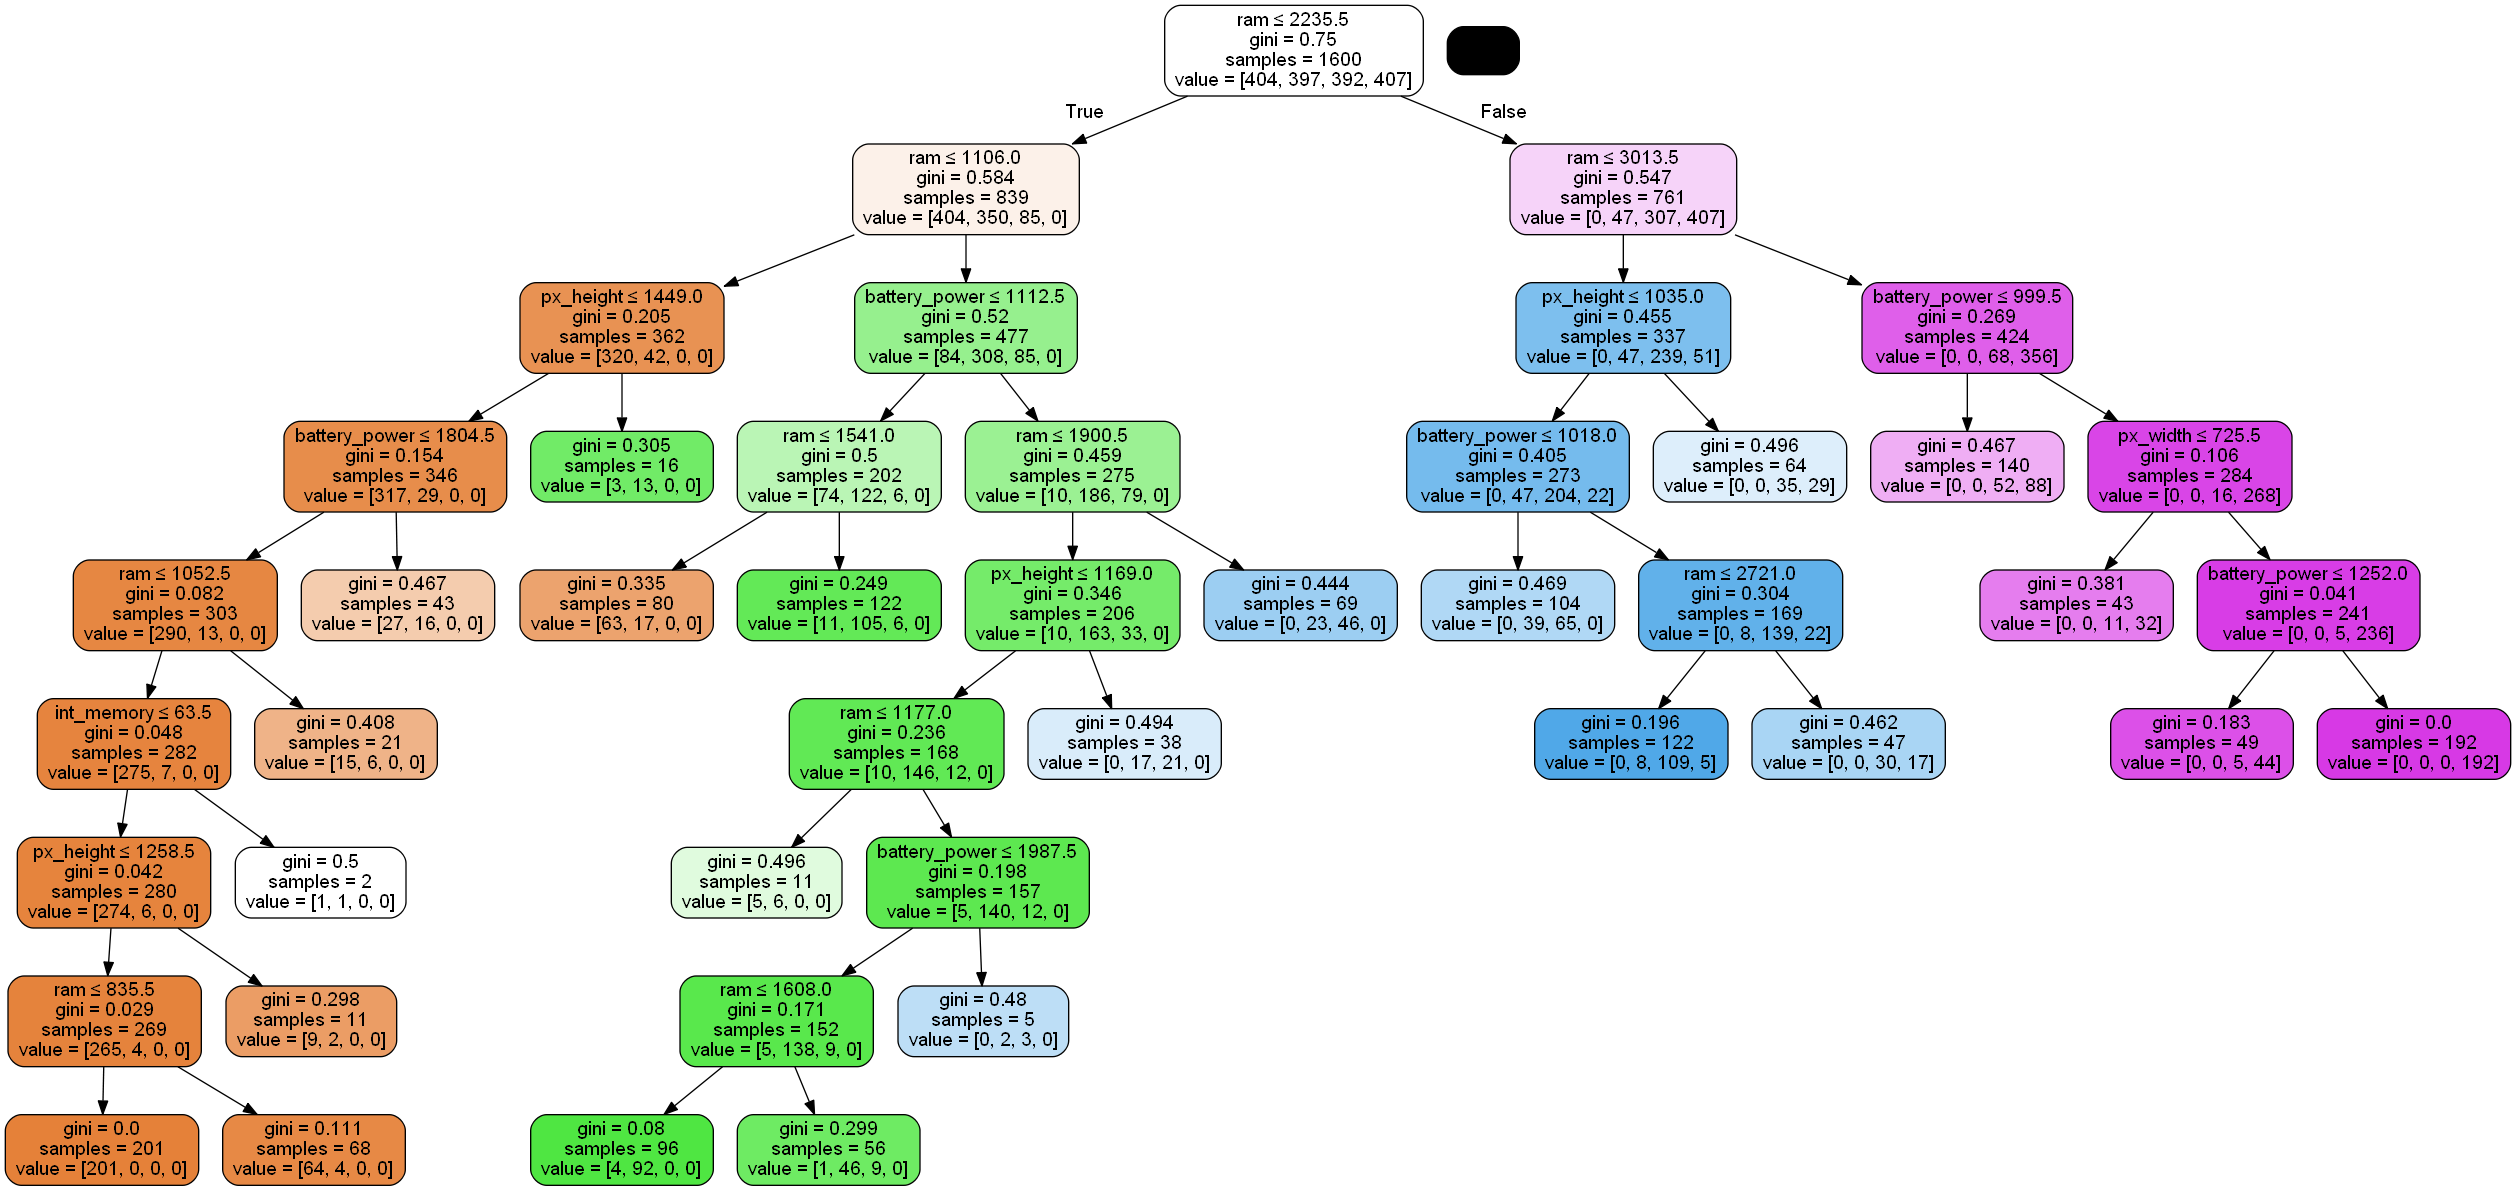

<Figure size 864x864 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(12,12))
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=tr_train_x.columns )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
tr_train, tr_test = train_test_split(tr, test_size = .2) 

In [26]:
tr_train_x  = tr_train.iloc[: , 0:-1]
tr_train_y  = tr_train.iloc[: , -1]

In [27]:
tr_test_x  = tr_test.iloc[: , 0:-1]
tr_test_y  = tr_test.iloc[: , -1]

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier()

In [30]:
rfc.fit(tr_train_x, tr_train_y)

RandomForestClassifier()

In [31]:
pred_tr = dt.predict(tr_test_x)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
tab_tr = confusion_matrix(tr_test_y, pred_tr)
tab_tr

array([[98,  8,  0,  0],
       [15, 50, 18,  0],
       [ 0,  6, 80, 20],
       [ 0,  0, 18, 87]], dtype=int64)

In [34]:
rfc.feature_importances_

array([0.07231801, 0.00656255, 0.02886329, 0.00757079, 0.02558886,
       0.00668192, 0.03404218, 0.02339264, 0.03731819, 0.02259516,
       0.03029518, 0.05722384, 0.05677837, 0.48572889, 0.02800445,
       0.02826156, 0.02992553, 0.00561098, 0.00715173, 0.00608587])

In [2]:
#pip install imblearn

In [35]:
df = pd.DataFrame({'Feature':tr_train_x.columns,'Values':dt.feature_importances_})
df.sort_values('Values',ascending=False)

,Feature,Values
13,ram,0.865853
0,battery_power,0.077345
11,px_height,0.050616
12,px_width,0.005047
6,int_memory,0.001139
18,touch_screen,0.000000
17,three_g,0.000000
16,talk_time,0.000000
15,sc_w,0.000000
14,sc_h,0.000000
